<h1><center>Reddit Sentimenter- C964 Capstone</center></h1>

In [4]:
#import packages
import praw
from datetime import date, timedelta
import os
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.core.display_functions import display

## Define Variables

In [5]:
g_client_id="hwukA0emNXXE_iaver84pg"
g_client_secret="Gly0NvAbFwi5rFmjN-UvyjfJ3uIP8g"
g_user_agent="SentimentAnalysisScraper"
g_subreddit = "Excel"
g_num_posts=250

## Getting Posts and Comments from Reddit

In [13]:
def init_reddit_app():
    reddit = praw.Reddit(
        client_id=g_client_id,
        client_secret=g_client_secret,
        user_agent=g_user_agent,check_for_async=False)
    return reddit


def get_posts(reddit, subreddit,time_span):
    posts = []
    top_posts = reddit.subreddit(subreddit).top(time_filter=time_span, limit=g_num_posts)

    for post in top_posts:
        posts.append(post.id)
    return posts


def get_comments(reddit, posts_id):
    df_comments = pd.DataFrame(columns=['post_id', 'comment_id', 'comment_text'])
    for _id in posts_id:
        submission = reddit.submission(id=_id)
        #print(submission.title, submission.num_comments)
        submission.comments.replace_more(limit=0)

        for comment in submission.comments.list():
            try:
                df_comments.loc[len(df_comments.index)] = [comment.submission.id, comment.id, comment.body]
            except AttributeError:
                pass
    return df_comments


def get_data(subreddit,time_span):
    reddit = init_reddit_app()
    postids = get_posts(reddit, subreddit, time_span)
    df = get_comments(reddit, postids)
#   display(df)
    return df

Score the Comments

In [14]:
def sentiment_analyser_score(df):
    analyser = SentimentIntensityAnalyzer()
    df_sentiment = pd.DataFrame(columns=["comment_id", "comp_score", "sentiment"])
    #   values = list(df.comment_text.values.flatten())
    values = list(df.comment_text.values)
    for row in values:
        score = analyser.polarity_scores(row)
        if score["compound"] > 0.5:
            sentiment = "positive"
        elif score["compound"] < -0.05:
            sentiment = "negative"
        else:
            sentiment = "neutral"
        df_sentiment.loc[len(df_sentiment.index)] = [df.comment_id.loc[len(df_sentiment.index)], score["compound"], sentiment]
        #      Add sentiment to df
    combined_df = df_sentiment.join(df.set_index("comment_id"), on="comment_id")
    #display(combined_df)

    return combined_df

def score_data(df):
    """
    """
    _df = sentiment_analyser_score(df).sort_values(by='comp_score',ascending=False)
  #  display(_df['comment_text'].head(10))
    return _df

In [15]:
def display_comments(df):
    _df = sentiment_analyser_score(df).sort_values(by='comp_score',ascending=False)
    display(_df['comment_text'].head(10))

In [16]:
def make_plot(df):
    df = df["comp_score"].rolling(400).mean()
    plt.plot(df)
    plt.xlabel("comment no")
    plt.ylabel("Compound Sentiment Score")
    plt.title("Running mean of Compound Sentiment Score, /r/soccer")
    plt.show()

In [17]:
def make_chart(df,time):
    fig, ax = plt.subplots()
    df=df["sentiment"].value_counts().sort_index(axis=0).plot(kind='bar',color=['tab:red','tab:blue','tab:green'])
    plt.title("Sentiment in /r/" + g_subreddit + " comments from past " + time)
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.set_ylabel('# of comments')
    plt.xticks(rotation=0)
    plt.show()


In [18]:
def comp_chart(df_d, df_w, df_m):
    fig, ax = plt.subplots()
    time = ['day', 'week', 'month']
    freq = [int(df_d['sentiment'].value_counts()["positive"]/len(df_d)*100),
            int(df_w['sentiment'].value_counts()["positive"]/len(df_w)*100),
            int(df_m['sentiment'].value_counts()["positive"]/len(df_m)*100)
            ]
    ax.bar(time, freq)
    ax.set_ylabel('% of positive comments')
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.set_title('Percentage of Positive /r/'+ g_subreddit + ' comments')
    plt.show()

## Daily Chart

importing posts


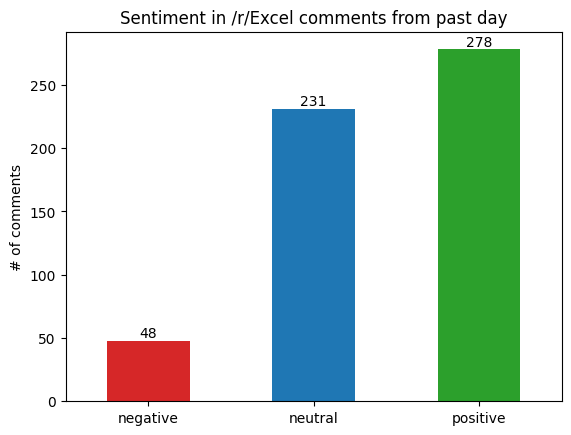

In [19]:
print("importing posts")
df_day = get_data(g_subreddit,'day')

#Analyze
scores_day = score_data(df_day)

#Generate Charts
plot_day = make_chart(scores_day,"day")

### 10 most Positive Comments - Daily

In [20]:
display_comments(df_day)

284    I usually use "paste values" to get around thi...
464    Yes, that is clear, but those numbers in the p...
448    Acronyms, initialisms, abbreviations, contract...
269    Acronyms, initialisms, abbreviations, contract...
395    I can't think of a way to accomplish this from...
278    I just solved that particular hiccup by tweaki...
21     Acronyms, initialisms, abbreviations, contract...
324    Acronyms, initialisms, abbreviations, contract...
151    You're welcome\n\nOFFSET can indeed select the...
68     Acronyms, initialisms, abbreviations, contract...
Name: comment_text, dtype: object

### Weekly Chart

importing posts
10 most positive posts in the past week


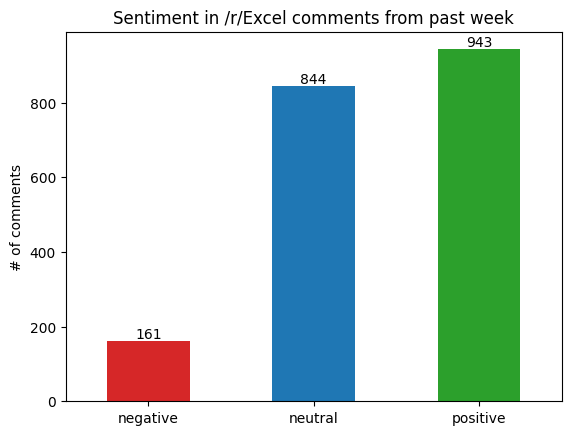

In [21]:
print("importing posts")
df_week = get_data(g_subreddit,'week')
print("10 most positive posts in the past week")
scores_week = score_data(df_week)

plot_week = make_chart(scores_week,"week")

### 10 most positive comments - week

In [22]:
display_comments(df_week)

1800    I usually use "paste values" to get around thi...
1678    I got you.  A couple options:\n\nhttps://previ...
1518    I'm not on desktop so it won't let me put fanc...
1162    If you’re changing the format and the values a...
1123    Acronyms, initialisms, abbreviations, contract...
752     Acronyms, initialisms, abbreviations, contract...
1785    Acronyms, initialisms, abbreviations, contract...
1647    It may be possible to use Pivot Tables instead...
1606    okay, it may be complicated, but I will do my ...
1666    Acronyms, initialisms, abbreviations, contract...
Name: comment_text, dtype: object

### Monthly- Chart

importing posts


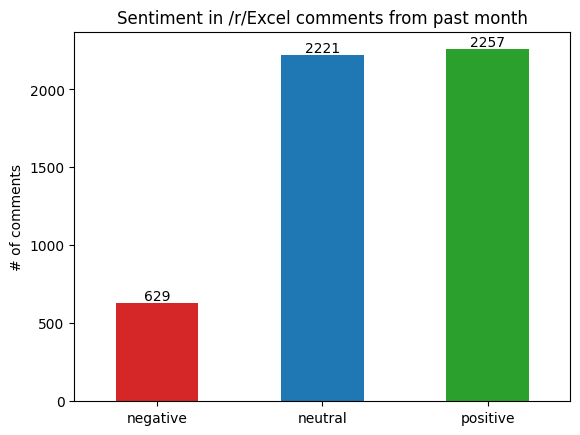

In [27]:
print("importing posts")
df_month = get_data(g_subreddit,'month')
scores_month = score_data(df_month)

plot_month = make_chart(scores_month,"month")

## 10 most positive comments - Month

In [28]:
display_comments(df_month)

2893    This sounds like you have no idea what you are...
1806    >this sounds absolutely exhausting\n\nWithout ...
1802    A few notes:\n\n* This is for macros, not calo...
1799    part 2/2\n\nSo at that point, it's not so much...
1808    >I don't see that has healthy emotional relati...
1779     Gamifying weight loss can be a fantastic way ...
1459    By the sounds of it, you’re probably already i...
2571        F1 Displays the Office Assistant or (Help ...
2573        Ctrl + A Displays formula palette given a ...
1793    >what kind of meals do you make for meal prep?...
Name: comment_text, dtype: object

## Percentage of positive comments over time

charting sentiment


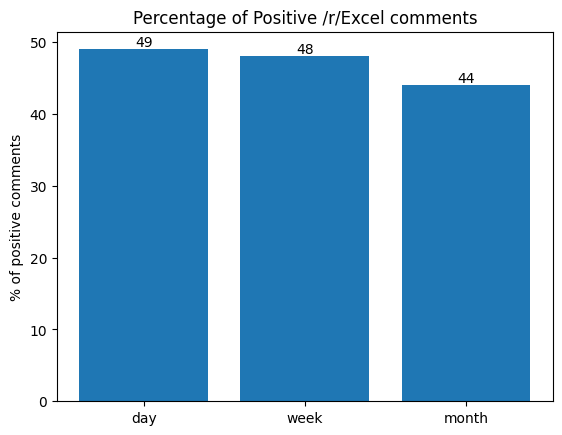

In [29]:
print("charting sentiment")
plot_chart = comp_chart(scores_day,scores_week,scores_month)